<a href="https://colab.research.google.com/github/udaykiran009/Convolutional-Neural-Network/blob/master/inference_colab_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BiomedParse Inference Demo Notebook

Welcome to the demo notebook for BiomedParse, a comprehensive tool for biomedical image analysis. BiomedParse is designed to simultaneously handle segmentation, detection, and recognition tasks across major biomedical image modalities, providing a unified solution for complex image analysis in biomedical research.

[[`Paper`](https://aka.ms/biomedparse-paper)] [[`Demo`](https://microsoft.github.io/BiomedParse/)] [[`Model`](https://huggingface.co/microsoft/BiomedParse)]  [[`Data`](https://huggingface.co/datasets/microsoft/BiomedParseData)]

## Model Checkpoint Access

The BiomedParse model checkpoint is hosted on [HuggingFace](https://huggingface.co/microsoft/BiomedParse). To access the model:

1. Visit the [model page](https://huggingface.co/microsoft/BiomedParse).
2. Make sure to review and accept the terms of use to gain access to the checkpoint.
3. Retrieve your HuggingFace access token from your user profile.

## Setting Up Access

To use the model, set your Hugging Face access token in the HF_TOKEN environment variable or as a Colab secret. This step ensures secure and authorized access to the model resources.

In [ ]:
# Set your Hugging Face access token in your environment
# import os
# os.environ['HF_TOKEN'] = 'your_huggingface_access_token_here'

# Or, if you are using Google Colab, set HF_TOKEN on Colab secrets.

In [2]:
from google.colab import userdata
import huggingface_hub

huggingface_hub.login(userdata.get('huggingface'))

In [3]:
from huggingface_hub import hf_hub_download

model_file = hf_hub_download(repo_id="microsoft/BiomedParse", filename="biomedparse_v1.pt", local_dir="pretrained")

print(f"Downloaded model file to: {model_file}")

biomedparse_v1.pt:   0%|          | 0.00/1.80G [00:00<?, ?B/s]

Downloaded model file to: pretrained/biomedparse_v1.pt


## Environment Setup

In [4]:
!git clone https://github.com/microsoft/BiomedParse

Cloning into 'BiomedParse'...
remote: Enumerating objects: 1593, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 1593 (delta 64), reused 56 (delta 56), pack-reused 1520 (from 2)
Receiving objects: 100% (1593/1593), 652.52 MiB | 16.59 MiB/s, done.
Resolving deltas: 100% (473/473), done.
Updating files: 100% (583/583), done.
Filtering content: 100% (45/45), 69.68 MiB | 16.76 MiB/s, done.


In [ ]:
!pip install -r BiomedParse/assets/requirements/requirements.txt

  Cloning https://github.com/MaureenZOU/detectron2-xyz.git to /tmp/pip-req-build-8d0e_y88
  Running command git clone --filter=blob:none --quiet https://github.com/MaureenZOU/detectron2-xyz.git /tmp/pip-req-build-8d0e_y88
  Resolved https://github.com/MaureenZOU/detectron2-xyz.git to commit 42121d75e10d9f858f3a91b6a39f5722c02868f0
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.5/121.5 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 93.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Prepar

# Restart Colab Runtime

In [ ]:
# Make sure to restart Colab runtime after installing dependencies
import os
try:
    import google.colab
    os._exit(0)
except ImportError:
    pass

In [ ]:
import os
os.chdir('/content/BiomedParse')
print(os.getcwd())

/content/BiomedParse


## Load the model weights

In [ ]:
from PIL import Image
import torch
import argparse
import numpy as np
from modeling.BaseModel import BaseModel
from modeling import build_model
from utilities.distributed import init_distributed # changed from utils
from utilities.arguments import load_opt_from_config_files
from utilities.constants import BIOMED_CLASSES
from inference_utils.inference import interactive_infer_image

conf_files = "configs/biomedparse_inference.yaml"
opt = load_opt_from_config_files([conf_files])
opt = init_distributed(opt)

model_file = "../pretrained/biomedparse_v1.pt"

model = BaseModel(opt, build_model(opt)).from_pretrained(model_file).eval().cuda()
with torch.no_grad():
    model.model.sem_seg_head.predictor.lang_encoder.get_text_embeddings(BIOMED_CLASSES + ["background"], is_eval=True)

/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:484: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(checkpoint_file, map_location=map

# Run Inference

In [ ]:
# RGB image input of shape (H, W, 3). Currently only batch size 1 is supported.
image = Image.open('examples/Part_1_516_pathology_breast.png', formats=['png'])
image = image.convert('RGB')

# text prompts querying objects in the image. Multiple ones can be provided.
prompts = ['neoplastic cells', 'inflammatory cells']

pred_mask = interactive_infer_image(model, image, prompts)
pred_mask.shape

(2, 1024, 1024)

In [ ]:
# load ground truth mask
gt_masks = []
for prompt in prompts:
    gt_mask = Image.open(f"examples/Part_1_516_pathology_breast_{prompt.replace(' ', '+')}.png", formats=['png'])
    gt_mask = 1*(np.array(gt_mask.convert('RGB'))[:,:,0] > 0)
    gt_masks.append(gt_mask)

# prediction with ground truth mask
for i, pred in enumerate(pred_mask):
    gt = gt_masks[i]
    dice = (1*(pred>0.5) & gt).sum() * 2.0 / (1*(pred>0.5).sum() + gt.sum())
    print(f'Dice score for {prompts[i]}: {dice:.4f}')

Dice score for neoplastic cells: 0.9022
Dice score for inflammatory cells: 0.9011


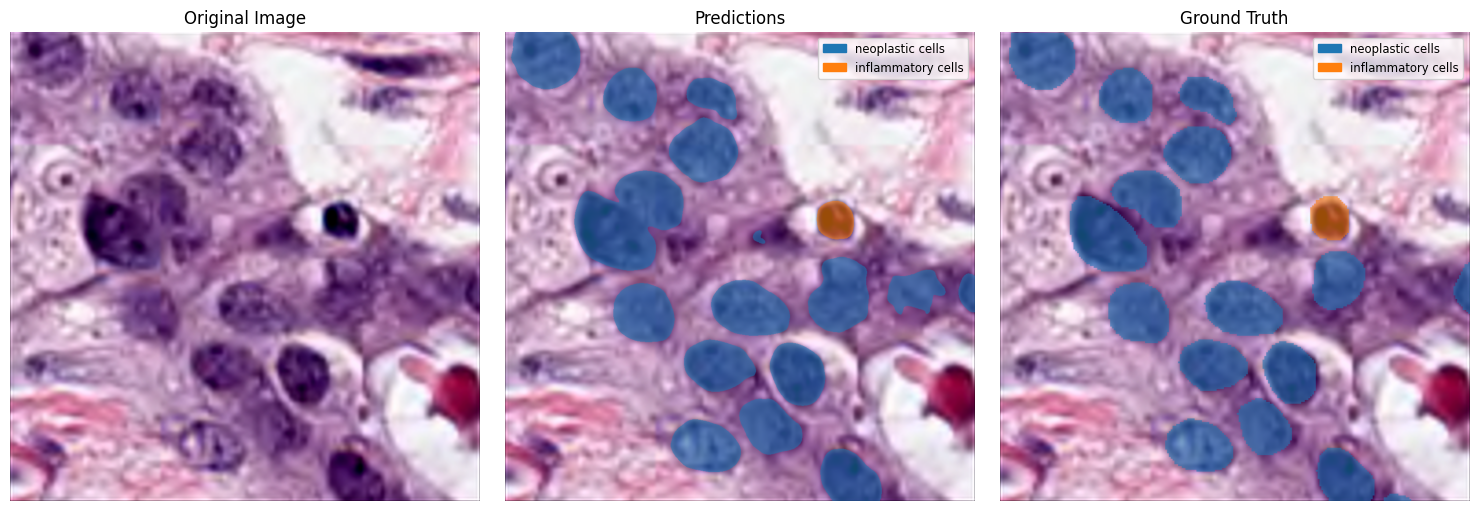

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.patches as mpatches

def overlay_masks(image, masks, colors):
    overlay = image.copy()
    overlay = np.array(overlay, dtype=np.uint8)
    for mask, color in zip(masks, colors):
        overlay[mask > 0] = (overlay[mask > 0] * 0.4 + np.array(color) * 0.6).astype(np.uint8)
    return Image.fromarray(overlay)

def generate_colors(n):
    cmap = plt.get_cmap('tab10')
    colors = [tuple(int(255 * val) for val in cmap(i)[:3]) for i in range(n)]
    return colors

original_image = Image.open('examples/Part_1_516_pathology_breast.png').convert('RGB')

colors = generate_colors(len(prompts))

pred_overlay = overlay_masks(original_image, [1*(pred_mask[i] > 0.5) for i in range(len(prompts))], colors)

gt_overlay = overlay_masks(original_image, gt_masks, colors)

legend_patches = [mpatches.Patch(color=np.array(color) / 255, label=prompt) for color, prompt in zip(colors, prompts)]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(original_image)
axes[0].set_title("Original Image")
axes[0].axis('off')

axes[1].imshow(pred_overlay)
axes[1].set_title("Predictions")
axes[1].axis('off')
axes[1].legend(handles=legend_patches, loc='upper right', fontsize='small')

axes[2].imshow(gt_overlay)
axes[2].set_title("Ground Truth")
axes[2].axis('off')
axes[2].legend(handles=legend_patches, loc='upper right', fontsize='small')

plt.tight_layout()
plt.show()